## Итоговая контрольная работа по блоку специализация

1) Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск:
Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите
менеджеру?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy import stats

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
df = pd.read_csv('ab_stats.csv')
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [5]:
df.shape

(23652, 5)

In [6]:
df.isnull().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

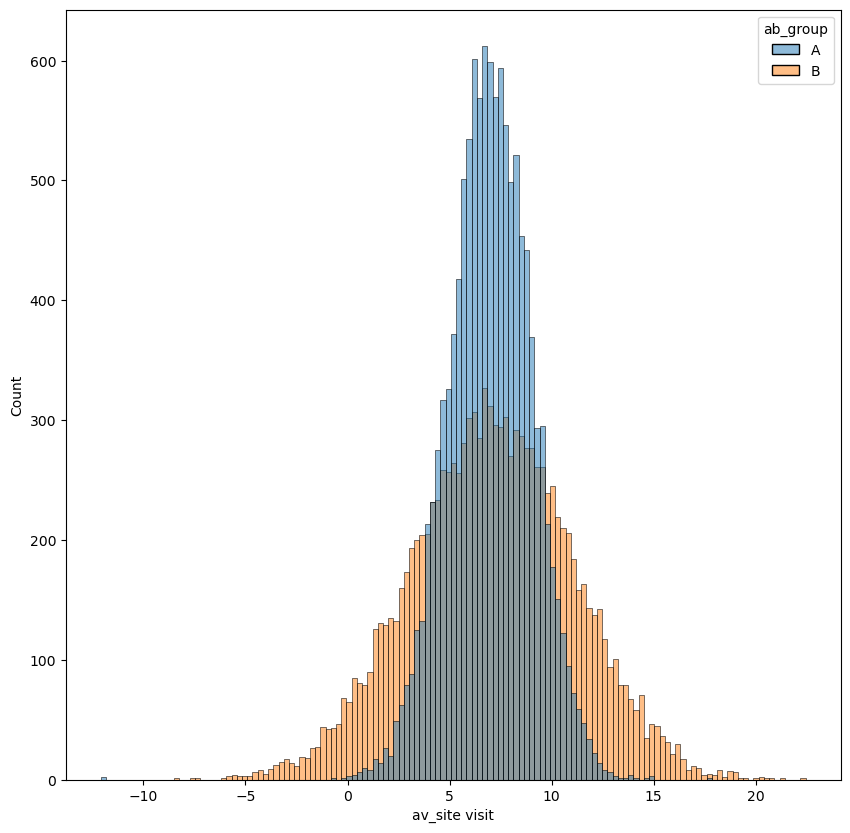

In [11]:
plt.figure(figsize=(10, 10)) # проверка на нормальность графиком
sns.histplot(df, x='av_site visit', hue="ab_group")
plt.show()

Считаем распределение нормальным. Для нормального распределения применяем двухсторонний t-критерий Стьюдента для незовисимых выборок

In [14]:
df_a = df[df['ab_group'] == 'A']
df_a.shape

(11835, 5)

In [15]:
df_b = df[df['ab_group'] == 'B']
df_b.shape

(11817, 5)

In [17]:
stats.ttest_ind(df_a['av_site visit'].values, df_b['av_site visit'].values)b

Ttest_indResult(statistic=-1.8730229329427048, pvalue=0.06107754367847282)

Если принять alpha = 0.05, то 
p-value=0.061 > alpha

Статистически значимого различия между группами нет.

**Рекомендации менеджеру: Поскольку статистически значимого различия между группами нет, в работе следует оставить исходную версию**

2) Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%,
мы ожидаем прирост в 0,2%.
Уровень доверия 97% и уровень мощности 87%.
Всего на наш продукт заходит 40 000 пользователей в месяц.

Расчитаем размер выборки на онлайт калькуляторе:
https://mindbox.ru/tools/ab-test-calculator/

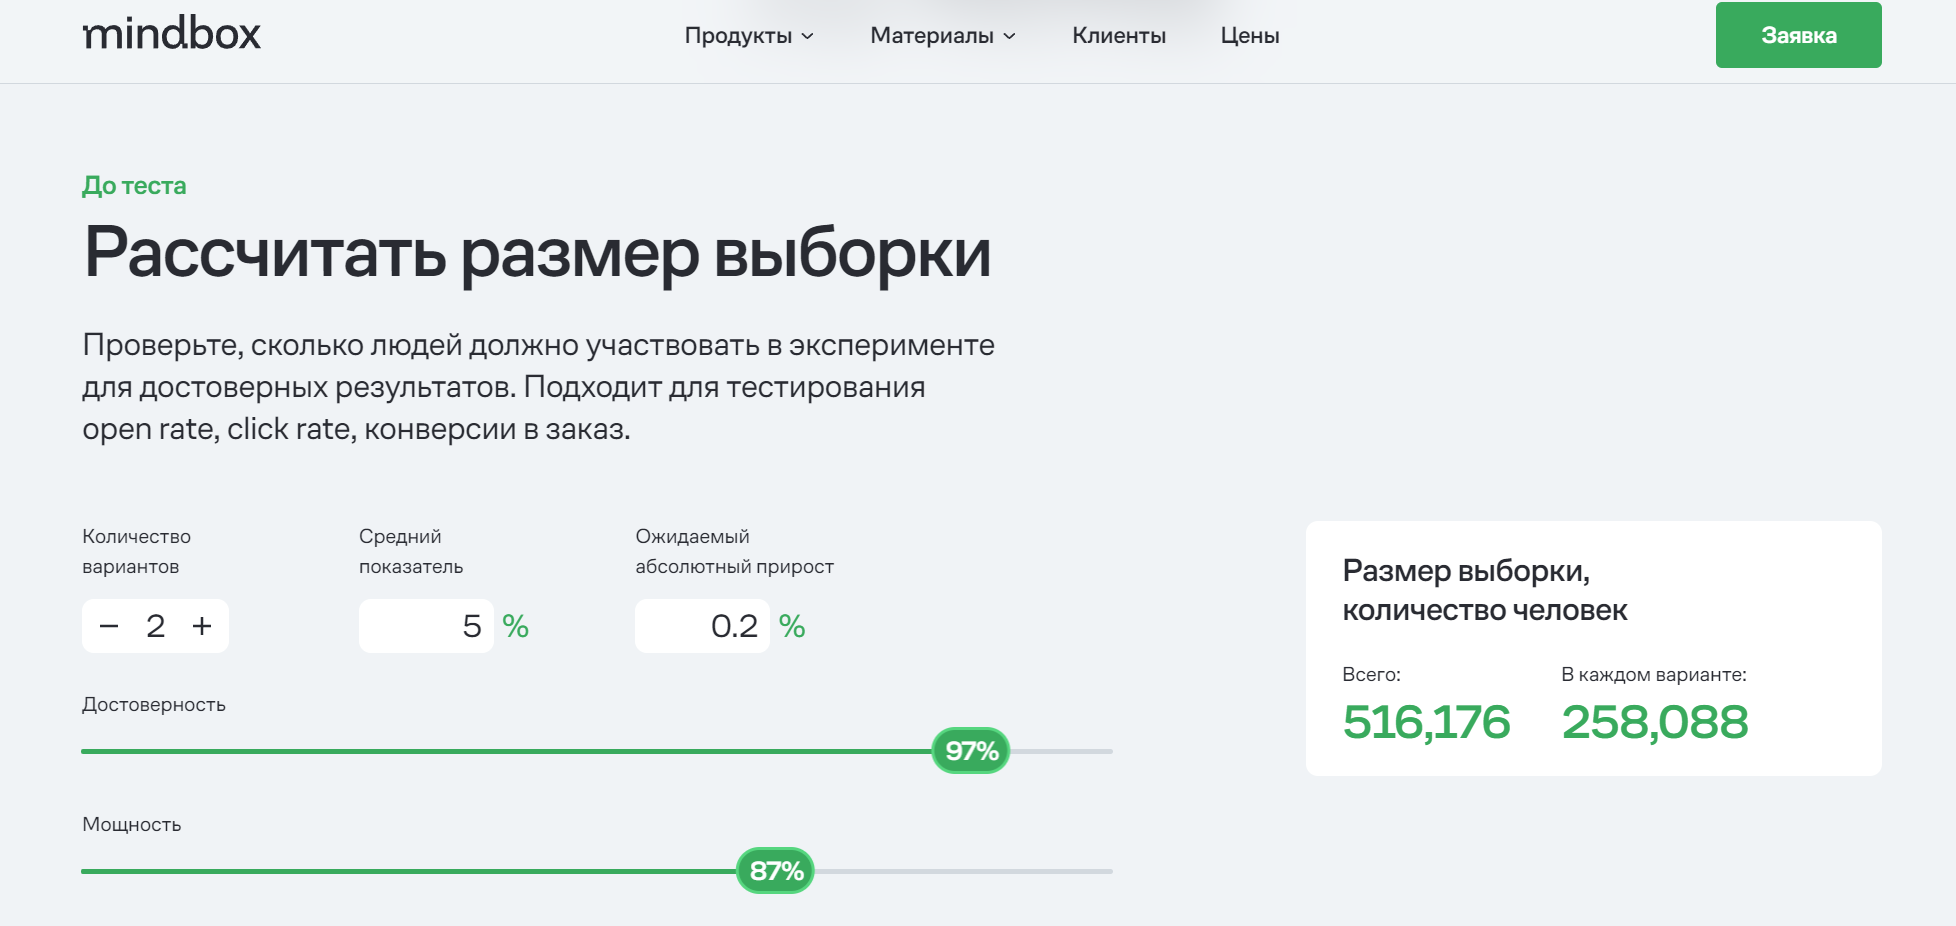

**Размер выборки составляет 258 088 пользователей для каждого варианта, т.е. 516 176 пользователей всего.**

3) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по
результатам подсчета?

При средней посещаемости сайта 40 000 пользователей в месяц, эксперимент надо держать 
516 176/40 000 = **12,9044** месяцев

Поскольку держать эксперимент в течение года не рационально, можно оптимизировать эксперимент, например использовать другие более чувствительные метрики, или же выделить подгруппу пользователей, для которых ожидаемый эффект будет значительно выше, что позволит уменьшить выборку и как следствие время проведения эксперимента.

3.1) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите
результаты тестирования, если у нас следующие результаты по количеству конверсии:

Сначала считаем абсолютное число конверсий в группе А = количество пользователей в группе * базовый уровень конверсии =  
= 258088 * 5% = 12904

Затем подставляем в калькулятор полученное количество конверсий в группе В

1) 25 000
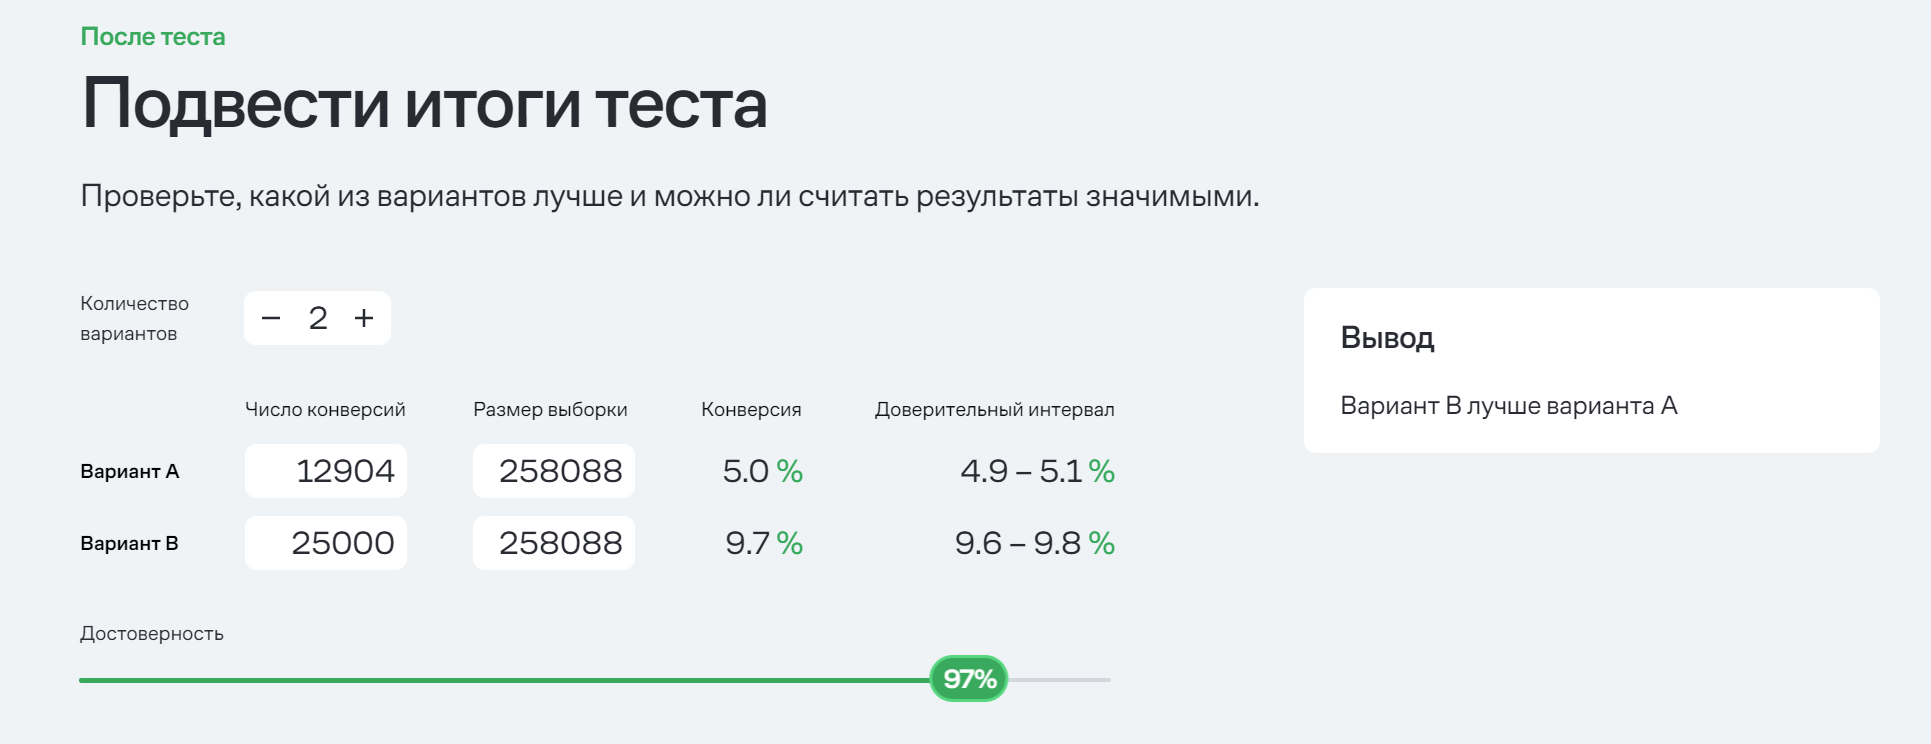

2) 30 000
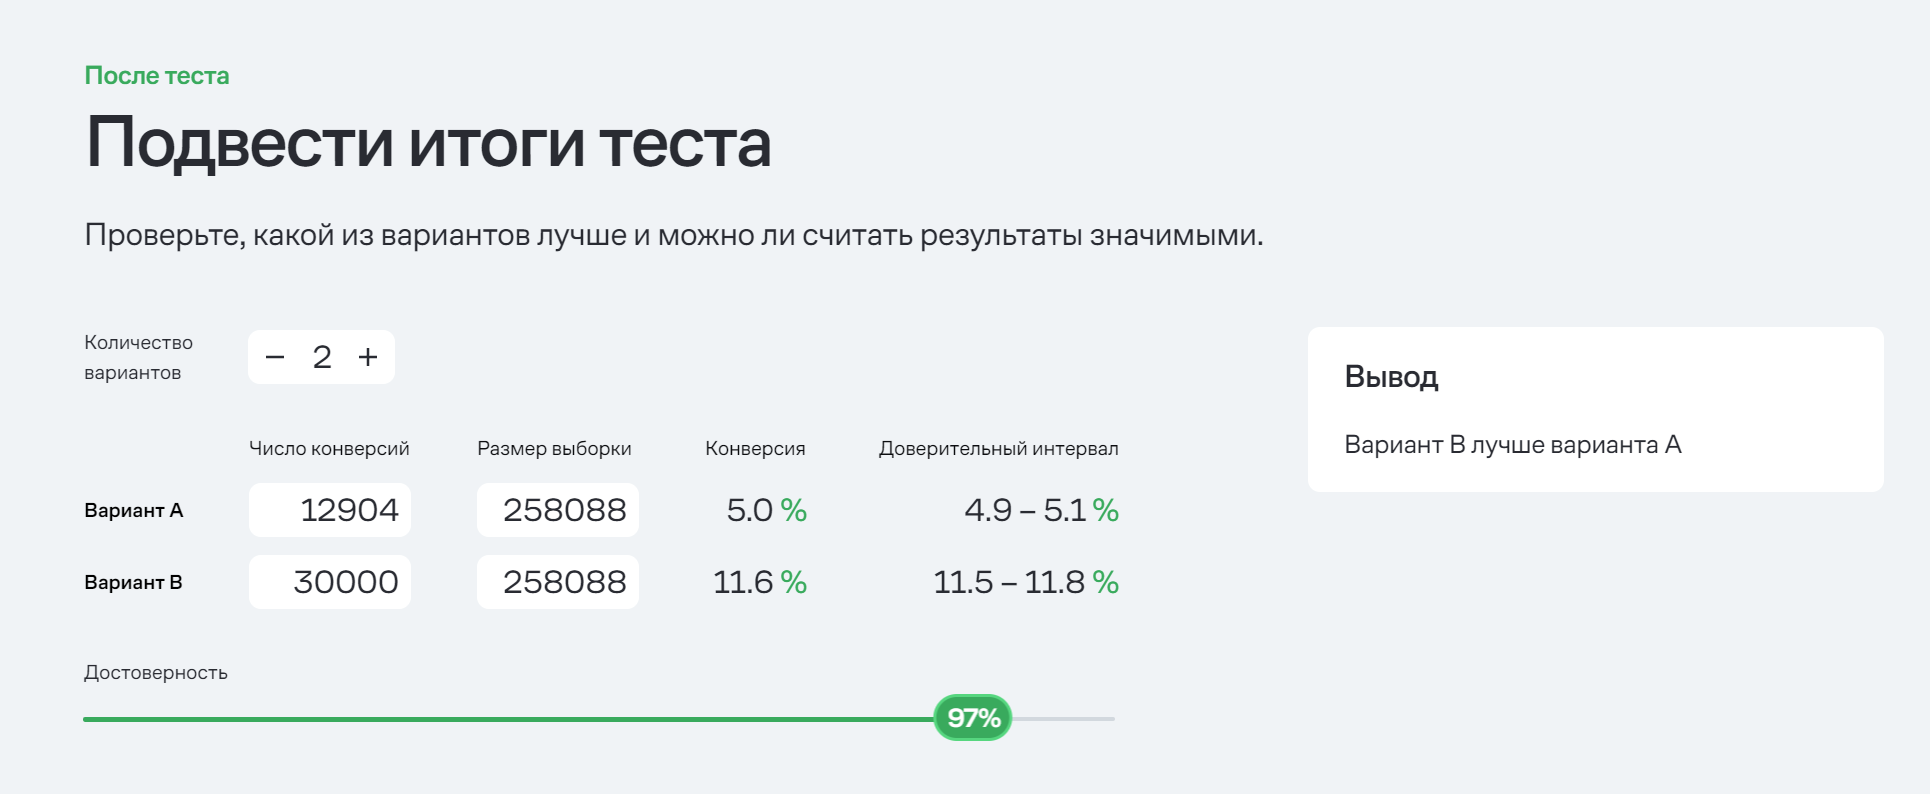

3) 32 000
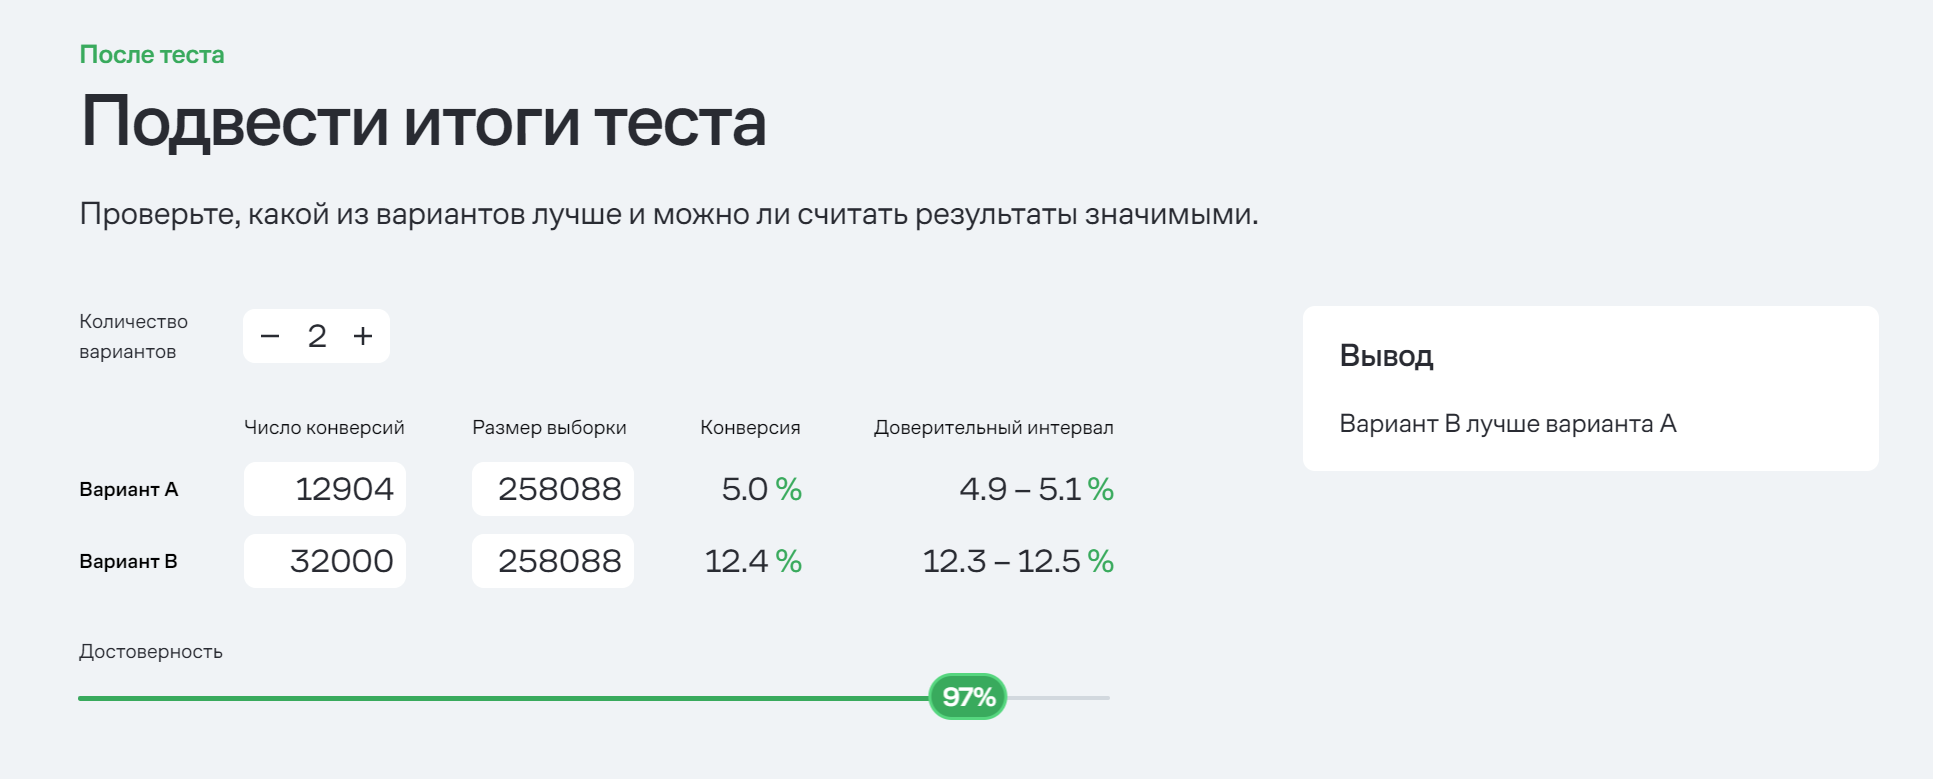

**Вариант В статистически значимо лучше варианта А**

4) Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в
каждой группе.
Для проверки нормальности распределения на выборке в 2350 наблюдений применили
критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.
Какой бы вывод мы могли сделать в данном случае?
В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше
всего подойдёт и почему ?

Критерий Шапиро-Уилка применяется для проверки на нормальность выборки, в которой меньше 5000 наблюдений. 
Н0: Распределение является нормальным
H1: Распределение не является нормальным
В данном случае p-value=0.00002, alpha = 5%.
p-value < alpha, отвергается H0, принимается H1, распределение не является нормальным

**Для метрики CPA, распределенной не нормально, для двух независимых выборок применяется критерий Манна-Уитни**

5) Мы провели АБ-тест на увеличение average timespent per user. По итогам тестирования мы
получили следующие данные. Является ли результат статистически значимым с уровнем
доверия 80%? Какую версию мы выкатим на продакшн?

A) Средняя - 360, отклонение - 40, количество - 9802

B) Средняя - 352, отклонение - 58, количество - 9789

Воспользуемся онлайн калькулятором для двухвыборочного t-теста Стьюдента
https://www.evanmiller.org/ab-testing/t-test.html

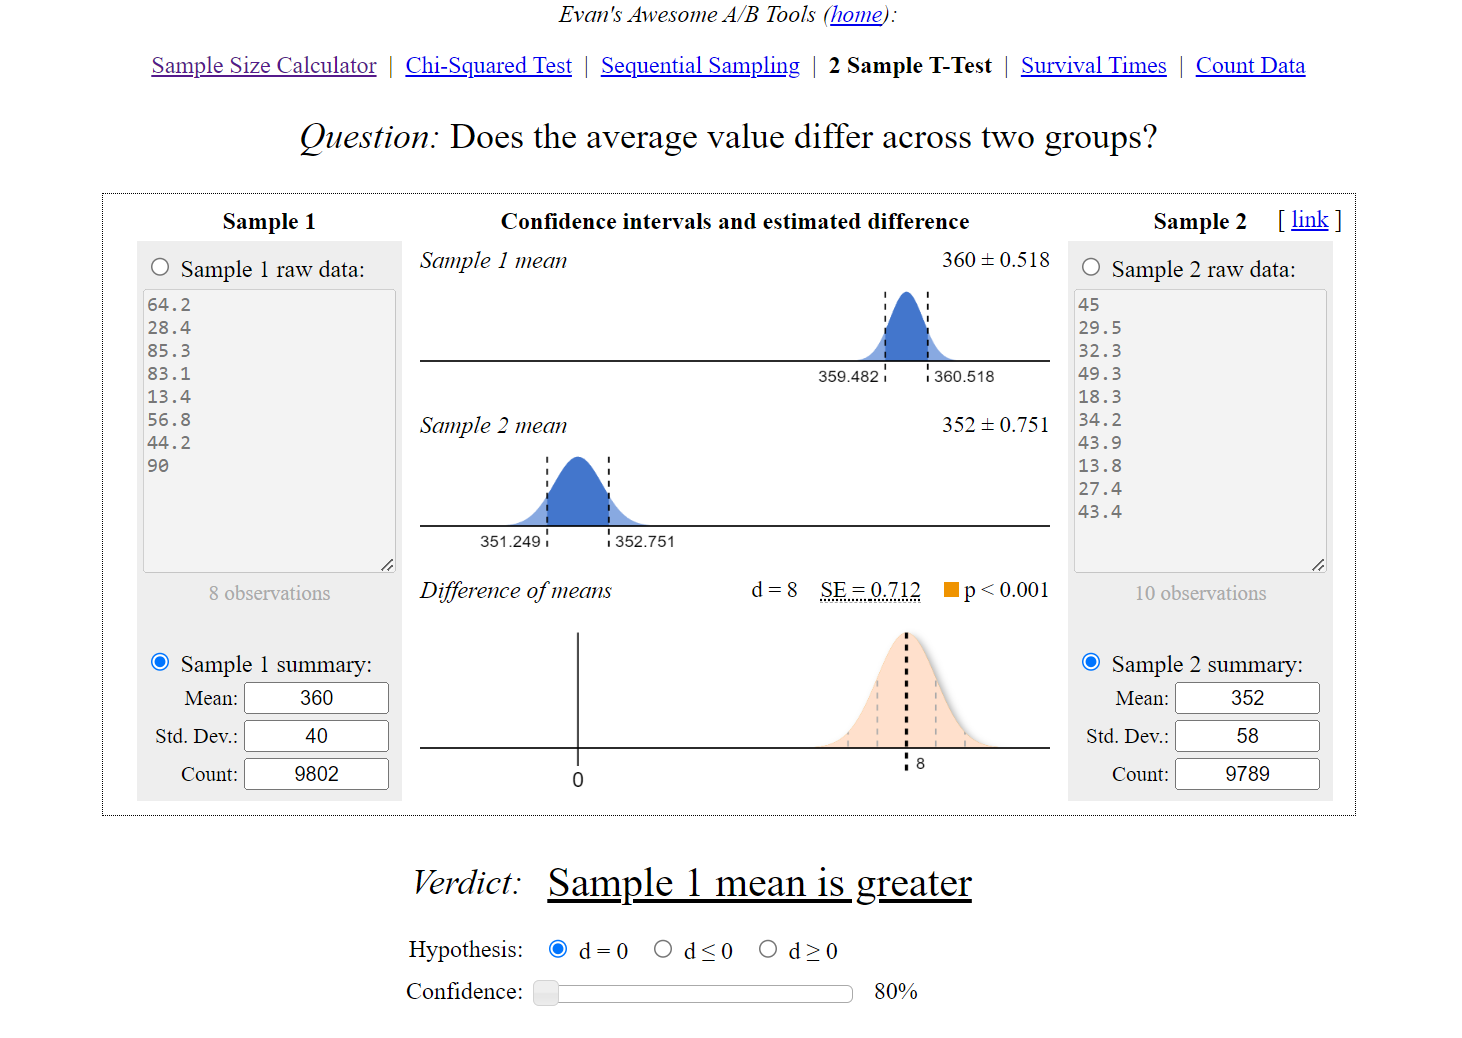

p < 0.001 < alpha

**Вариант А статистически значимо лучше варианта В**

6) Создайте техническую архитектуру проекта по аб тестированию продукта он-лайн кинотеатра
с учетом кросс-девайс аналитики по следующей гипотезе:
Если договориться с банком о 99% кэшбэке на подписку первого месяца, то это повысит
конверсию в подписку на 30%, благодаря упрощенному принятию решения со стороны
пользователя.
На схеме необходимо отобразить:
1. Управленческий процесс по договоренностям с внешними партнерами
2. Архитектуру данных с указанием систем, из которых будем скачивать данные
3. Внутрикомандное взаимодействие

Схема процесса и архитектуры данных описана в miro и доступна по ссылке: https://miro.com/app/board/uXjVKaD46RI=/?share_link_id=146947735740

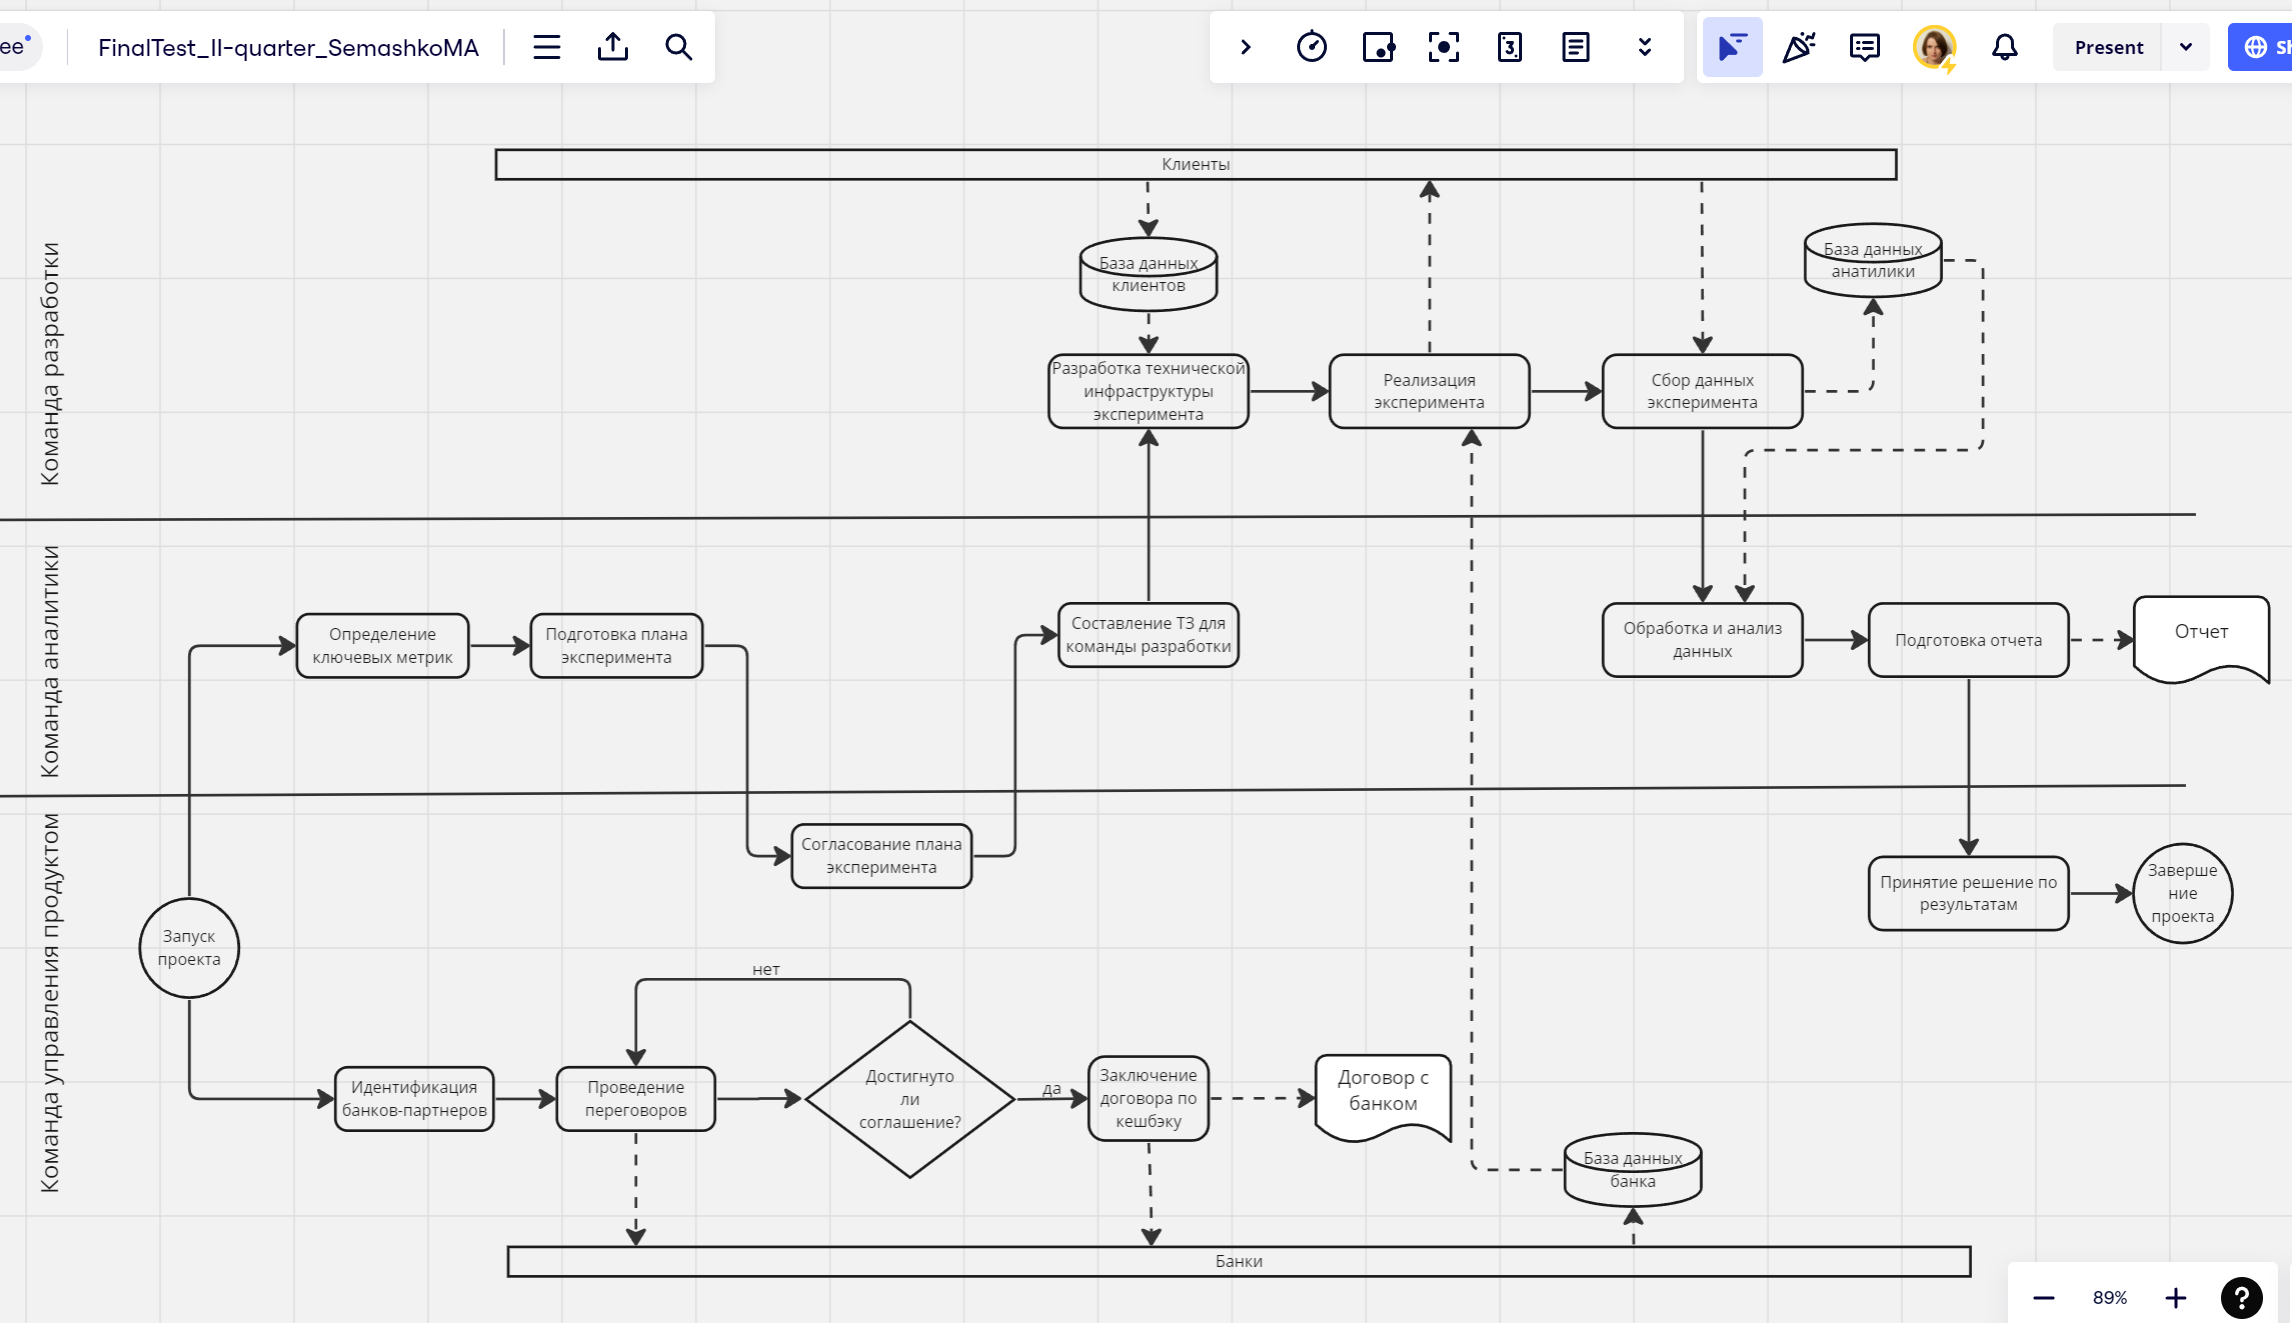